In [6]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.multivariate.pca import PCA
from datetime import datetime
import pandas as pd

In [7]:
df = pd.read_csv(r'dataset/table_AIH_2009_2024_CLEAN.csv', sep=';')

In [15]:
df.columns

Index(['ano', 'mes', 'municipio', 'regiao_codigo', 'regiao_nome', 'uf_codigo',
       'uf', 'uf_nome', 'capital', 'numero_habitantes', 'populacao_faixa',
       'diagnostico_ultrasonografia_qtd', 'partos_e_nascimentos_qtd',
       'cirurgias_obstetricas_qtd', 'diagnostico_ultrasonografia_val',
       'partos_e_nascimentos_val', 'cirurgias_obstetricas_val', 'longitude',
       'latitude', 'data', 'time'],
      dtype='object')

In [438]:
df_gb_ano = df.groupby(['ano', 'populacao_faixa'], observed=False).agg({'partos_e_nascimentos_qtd': 'sum'}).reset_index()

In [439]:
df_gb_ano.set_index('ano', inplace=True)

In [440]:
df_gb_ano = df_gb_ano.loc['2009':'2023']

In [441]:
df_gb_ano.reset_index(inplace=True)

In [442]:
df_pivot = df_gb_ano.pivot(index='populacao_faixa', columns='ano', values='partos_e_nascimentos_qtd')

In [444]:
df_pivot

ano,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
populacao_faixa,,,,,,,,,,,,,,,
01 - Até 10.000 habitantes,16432.0,14392.0,12310.0,9579.0,8102.0,7210.0,7012.0,6028.0,5775.0,5424.0,4425.0,4144.0,3752.0,3350.0,2764.0
02 - De 10.001 a 20.000 habitantes,88293.0,80512.0,73456.0,62798.0,56397.0,52860.0,53707.0,47705.0,46134.0,45420.0,42484.0,39390.0,39122.0,34599.0,30607.0
03 - De 20.001 a 50.000 habitantes,219014.0,205912.0,190570.0,168627.0,157390.0,155454.0,159680.0,147122.0,146706.0,148216.0,141283.0,132433.0,131738.0,119127.0,110328.0
04 - De 50.001 a 100.000 habitantes,190646.0,176463.0,168948.0,153788.0,152959.0,152317.0,162777.0,154648.0,159343.0,162218.0,157504.0,144083.0,140188.0,131457.0,126846.0
05 - De 100.001 a 500.000 habitantes,398201.0,381793.0,367572.0,359660.0,367481.0,373389.0,390972.0,372971.0,372663.0,376411.0,371145.0,342504.0,339983.0,321350.0,309557.0
06 - De 500.001 a 1.000.000 habitantes,114311.0,109732.0,110618.0,106953.0,101339.0,106970.0,115938.0,112766.0,113949.0,116472.0,112766.0,107295.0,103690.0,95094.0,90437.0
07 - Acima de 1.000.000 habitantes,258290.0,254226.0,257951.0,249143.0,252630.0,255566.0,270917.0,264289.0,268061.0,278949.0,265578.0,243608.0,233447.0,213991.0,204576.0


In [445]:
a = list(range(2009,2024))

In [446]:
df_pivot['soma_valores'] = df_pivot[a].sum(axis=1)

In [447]:
df_filtered = df_pivot[df_pivot['soma_valores'] != 0]

In [448]:
df_filtered = df_filtered.drop(columns=['soma_valores'])

<Axes: xlabel='ano'>

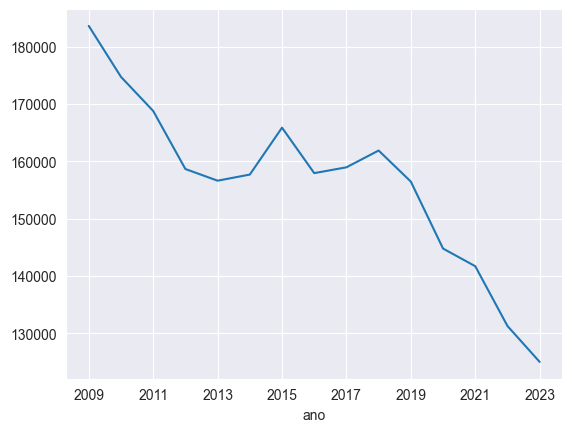

In [449]:
df_filtered.mean().plot()

In [450]:
df_filtered

ano,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
populacao_faixa,,,,,,,,,,,,,,,
01 - Até 10.000 habitantes,16432.0,14392.0,12310.0,9579.0,8102.0,7210.0,7012.0,6028.0,5775.0,5424.0,4425.0,4144.0,3752.0,3350.0,2764.0
02 - De 10.001 a 20.000 habitantes,88293.0,80512.0,73456.0,62798.0,56397.0,52860.0,53707.0,47705.0,46134.0,45420.0,42484.0,39390.0,39122.0,34599.0,30607.0
03 - De 20.001 a 50.000 habitantes,219014.0,205912.0,190570.0,168627.0,157390.0,155454.0,159680.0,147122.0,146706.0,148216.0,141283.0,132433.0,131738.0,119127.0,110328.0
04 - De 50.001 a 100.000 habitantes,190646.0,176463.0,168948.0,153788.0,152959.0,152317.0,162777.0,154648.0,159343.0,162218.0,157504.0,144083.0,140188.0,131457.0,126846.0
05 - De 100.001 a 500.000 habitantes,398201.0,381793.0,367572.0,359660.0,367481.0,373389.0,390972.0,372971.0,372663.0,376411.0,371145.0,342504.0,339983.0,321350.0,309557.0
06 - De 500.001 a 1.000.000 habitantes,114311.0,109732.0,110618.0,106953.0,101339.0,106970.0,115938.0,112766.0,113949.0,116472.0,112766.0,107295.0,103690.0,95094.0,90437.0
07 - Acima de 1.000.000 habitantes,258290.0,254226.0,257951.0,249143.0,252630.0,255566.0,270917.0,264289.0,268061.0,278949.0,265578.0,243608.0,233447.0,213991.0,204576.0


In [162]:
df_filtered.T

municipio,Abadia dos Dourados,Abaetetuba,Abaeté,Abaré,Abatiá,Abel Figueiredo,Abelardo Luz,Abre Campo,Abreu e Lima,Acaraú,...,Água Fria,Água Preta,Águas Belas,Águas Formosas,Águas Lindas de Goiás,Águas Vermelhas,Águas de Lindóia,Álvares Machado,Érico Cardoso,Óbidos
ano,,,,,,,,,,,,,,,,,,,,,
2009,32.0,1529.0,74.0,202.0,30.0,55.0,131.0,87.0,255.0,664.0,...,12.0,27.0,497.0,358.0,232.0,146.0,114.0,33.0,0.0,841.0
2010,34.0,1288.0,55.0,146.0,17.0,51.0,158.0,65.0,590.0,873.0,...,64.0,6.0,584.0,394.0,53.0,167.0,137.0,69.0,0.0,728.0
2011,22.0,1079.0,69.0,105.0,5.0,65.0,138.0,30.0,785.0,882.0,...,28.0,0.0,562.0,337.0,65.0,167.0,114.0,130.0,0.0,804.0
2012,21.0,893.0,64.0,106.0,2.0,44.0,136.0,44.0,227.0,725.0,...,17.0,0.0,463.0,334.0,21.0,77.0,123.0,165.0,0.0,736.0
2013,4.0,1120.0,75.0,101.0,8.0,56.0,111.0,39.0,707.0,932.0,...,43.0,0.0,440.0,377.0,25.0,88.0,134.0,112.0,0.0,745.0
2014,2.0,1014.0,63.0,106.0,0.0,41.0,119.0,37.0,661.0,865.0,...,46.0,17.0,378.0,416.0,71.0,74.0,93.0,0.0,0.0,756.0
2015,0.0,1035.0,63.0,102.0,0.0,58.0,107.0,19.0,1329.0,1142.0,...,80.0,5.0,345.0,303.0,84.0,99.0,118.0,0.0,0.0,695.0
2016,1.0,935.0,55.0,68.0,0.0,46.0,83.0,19.0,194.0,1077.0,...,78.0,1.0,336.0,293.0,58.0,78.0,102.0,0.0,0.0,747.0
2017,4.0,1021.0,40.0,85.0,0.0,53.0,82.0,19.0,1083.0,1043.0,...,84.0,0.0,288.0,226.0,74.0,97.0,120.0,0.0,0.0,754.0


In [460]:
pca_model = PCA(df_filtered.T, standardize=True, demean=True)

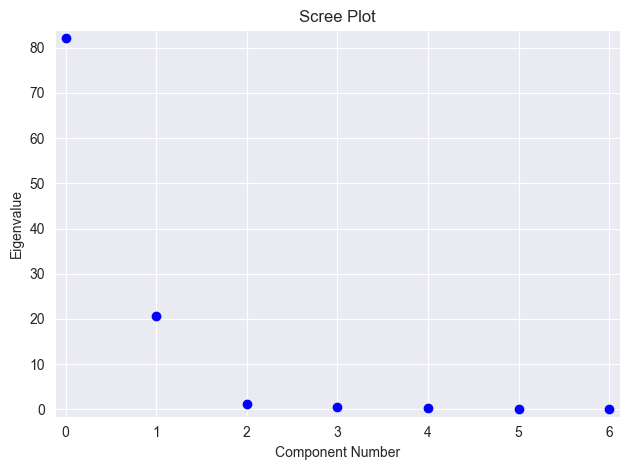

In [515]:
fig = pca_model.plot_scree(log_scale=False)

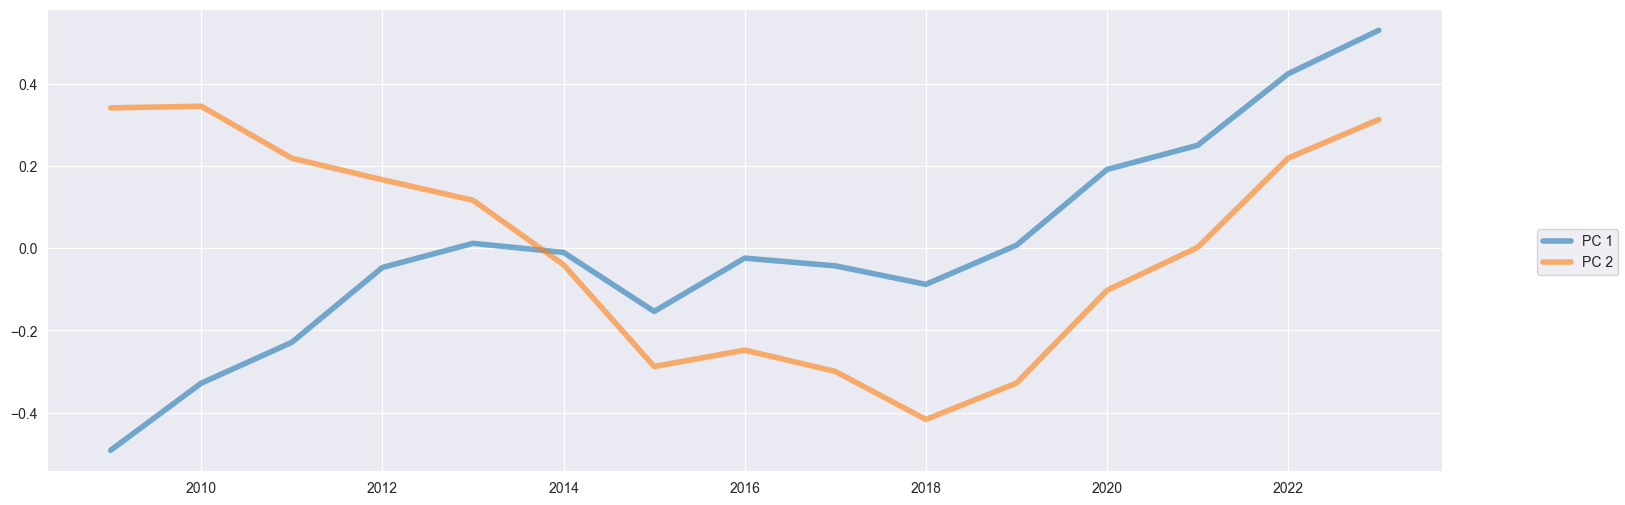

In [516]:
fig, ax = plt.subplots(figsize=(18, 6))
lines = ax.plot(pca_model.factors.iloc[:, :2], lw=4, alpha=0.6)
legend = fig.legend(lines, ["PC 1", "PC 2", "PC 3"], loc="center right")



In [490]:
idx = pca_model.loadings.iloc[:, 0].argsort()
df_filtered.index[idx[:-4]]

Index(['04 - De  50.001 a 100.000 habitantes',
       '05 - De 100.001 a 500.000 habitantes',
       '03 - De  20.001 a 50.000 habitantes'],
      dtype='object', name='populacao_faixa')

In [427]:
idx = idx.sort_values(ascending=False)
idx[-4:]

regiao_nome
Sudeste         3
Norte           2
Sul             1
Centro-Oeste    0
Name: comp_0, dtype: int64

In [303]:
pca_model.loadings.sort_values('comp_00', ascending=True)[-5:]['comp_00']

municipio
Caieiras      0.042215
Biguaçu       0.043057
Mamanguape    0.046589
Mesquita      0.078870
Brasília      0.609307
Name: comp_00, dtype: float64

In [260]:
idx = idx.sort_values(ascending=True)

In [272]:
idx

municipio
Brasília              0.609307
Mesquita              0.078870
Mamanguape            0.046589
Biguaçu               0.043057
Caieiras              0.042215
Goiânia               0.041169
Balneário Camboriú    0.039037
Serra                 0.037652
Boa Vista             0.037528
Caruaru               0.035972
Name: comp_00, dtype: float64

In [491]:
def make_plot(labels, pca):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax = df_filtered.loc[labels].T.plot(legend=False, grid=False, ax=ax)
    df_filtered.mean().plot(ax=ax, grid=False, label="Mean")
    # ax.set_xlim(0, 51)
    # fig.subplots_adjust(0.1, 0.1, 0.75, 0.9)
    ax.set_xlabel("ano", size=17)
    ax.set_ylabel("partos", size=17)
    plt.title(pca)
    ax.legend(
        *ax.get_legend_handles_labels(), loc="center left", bbox_to_anchor=(1, 0.5)
    )
    # legend.draw_frame(False)

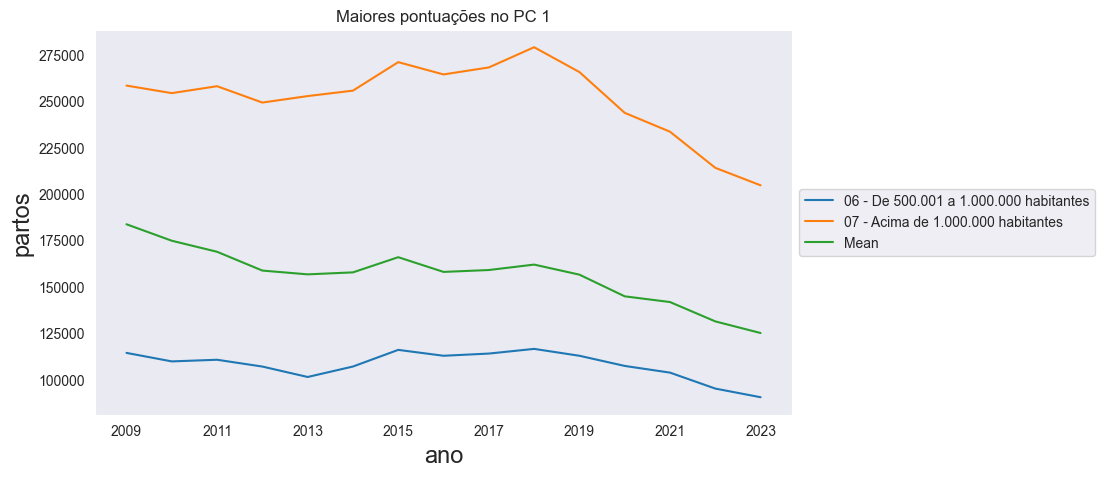

In [514]:
idx = pca_model.loadings.iloc[:, 0].argsort()
labels = df_filtered.index[idx[-2:]]
make_plot(labels, 'Maiores pontuações no PC 1')

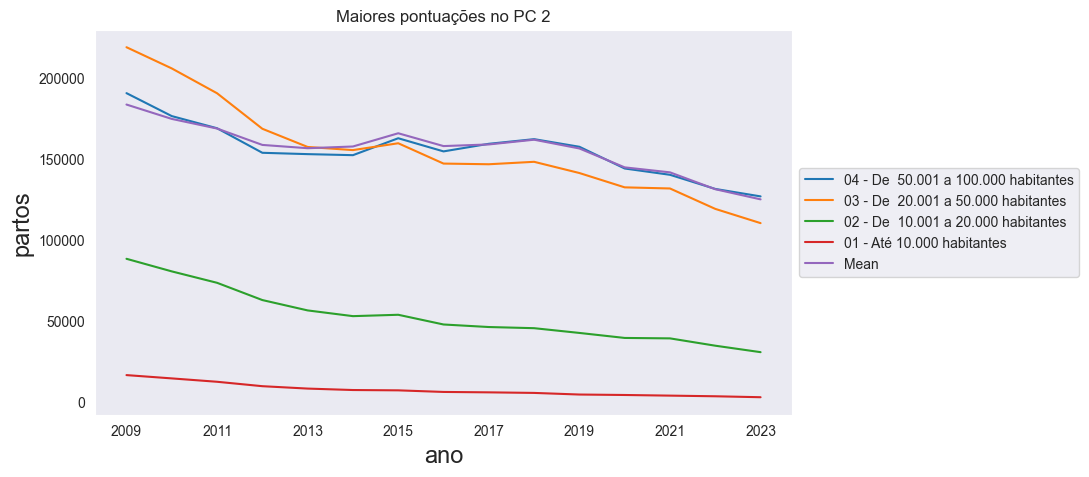

In [517]:
idx = pca_model.loadings.iloc[:, 1].argsort()
make_plot(df_filtered.index[idx[-4:]], 'Maiores pontuações no PC 2')


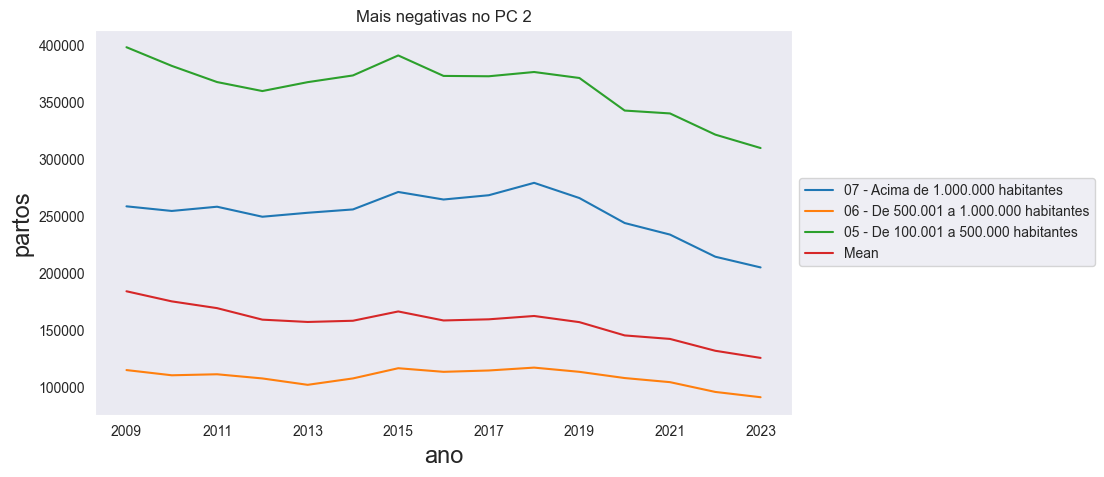

In [518]:
make_plot(df_filtered.index[idx[:3]], 'Mais negativas no PC 2')


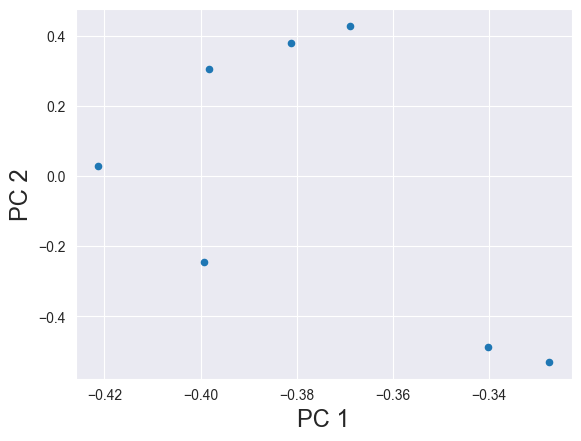

In [519]:
fig, ax = plt.subplots()
pca_model.loadings.plot.scatter(x="comp_0", y="comp_1", ax=ax)
ax.set_xlabel("PC 1", size=17)
ax.set_ylabel("PC 2", size=17)
plt.show()


In [474]:
pca_model.factors[['comp_0', 'comp_1']]

,comp_0,comp_1
ano,,
2009,-0.491921,0.341556
2010,-0.328598,0.345545
2011,-0.229159,0.219055
2012,-0.046972,0.166678
2013,0.011799,0.116676
2014,-0.010302,-0.040273
2015,-0.153922,-0.288025
2016,-0.024121,-0.248091
2017,-0.043020,-0.300003


In [478]:
pca_model.eigenvals / pca_model.eigenvals.sum()

0    0.783038
1    0.196421
2    0.011546
3    0.005724
4    0.002934
5    0.000269
6    0.000069
Name: eigenvals, dtype: float64

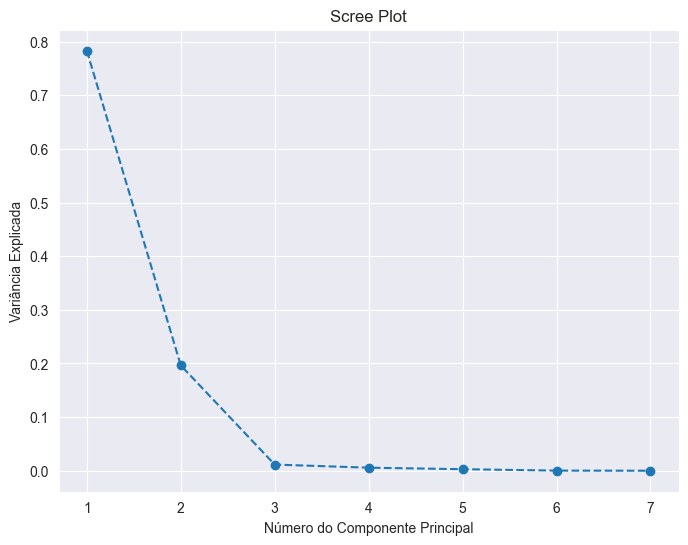

In [520]:
# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca_model.eigenvals) + 1), pca_model.eigenvals / pca_model.eigenvals.sum(), marker='o', linestyle='--')
plt.xlabel('Número do Componente Principal')
plt.ylabel('Variância Explicada')
plt.title('Scree Plot')
plt.show()

In [405]:
df_filtered.index[pca_model.loadings.iloc[:, 0] > 0.3].values

array(['Brasília'], dtype=object)

In [408]:
df_filtered.index[pca_model.loadings.iloc[:, 1] > 0.3].values

array(['Brasília', 'Rio de Janeiro', 'São Paulo'], dtype=object)

### PC3

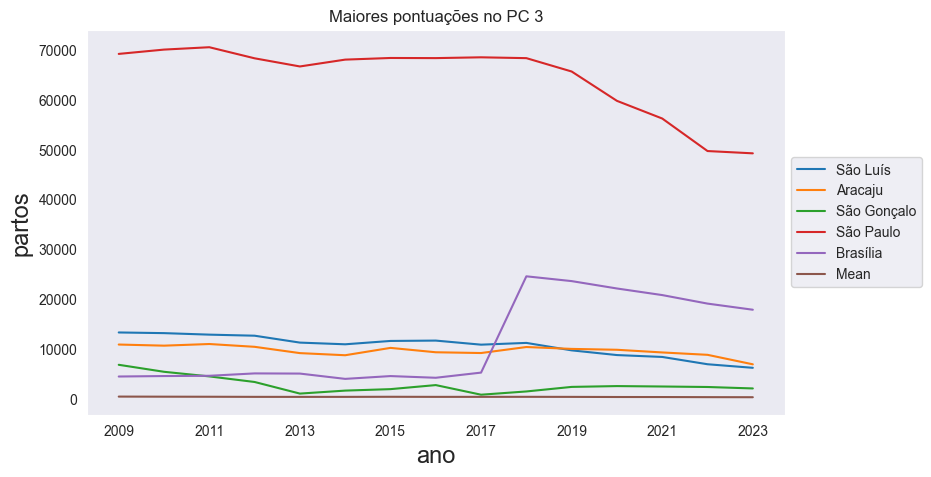

In [393]:
idx = pca_model.loadings.iloc[:, 2].argsort()
make_plot(df_filtered.index[idx[-5:]], 'Maiores pontuações no PC 3')

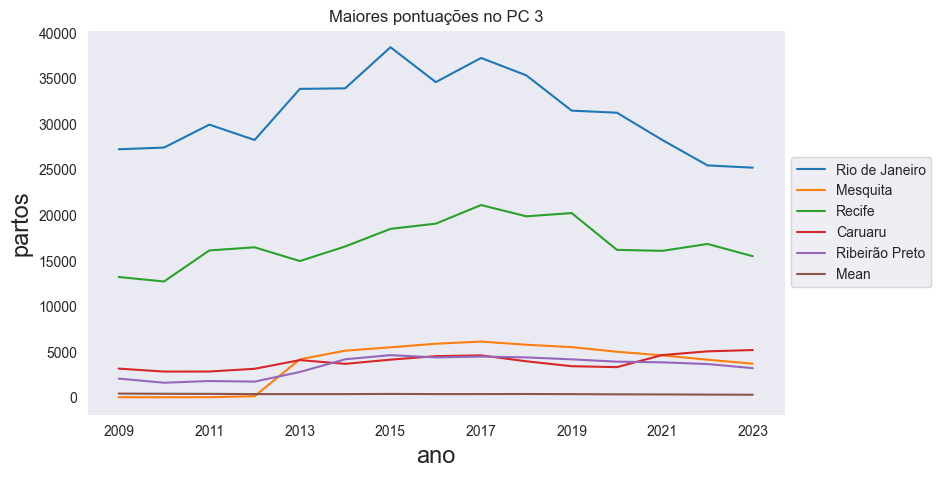

In [394]:
make_plot(df_filtered.index[idx[:5]], 'Maiores pontuações no PC 3')

In [9]:
df['data'] = list(map(lambda x,y: "{}-{}".format(x,y), df['ano'], df['mes']))

In [10]:
def convert_to_datetime(data):
    return datetime.strptime(data, format("%Y-%m"))

In [11]:
df['time'] = list(map(lambda x: convert_to_datetime(x), df['data']))

In [12]:
df_st = df.groupby(['time']).agg({'partos_e_nascimentos_qtd': 'sum',
                                  'partos_e_nascimentos_val':'sum',
                                  'cirurgias_obstetricas_qtd': 'sum',
                                  'cirurgias_obstetricas_val': 'sum'})

In [13]:
df_st.head()

,partos_e_nascimentos_qtd,partos_e_nascimentos_val,cirurgias_obstetricas_qtd,cirurgias_obstetricas_val
time,,,,
2009-01-01,105424.0,56176411.81,70826.0,34960984.60
2009-02-01,102933.0,54825506.19,69128.0,34439919.89
2009-03-01,117114.0,62399264.22,77726.0,38846455.60
2009-04-01,113382.0,60340947.92,75718.0,37832404.45
2009-05-01,114401.0,61212225.34,76650.0,38719927.20


In [14]:
df_st = df_st['2009-01-01':'2023-12-01']